/tmp/ipykernel_13/1093757231.py:8: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/250k-medicines-usage-side-effects-and-substitutes/medicine_dataset.csv')


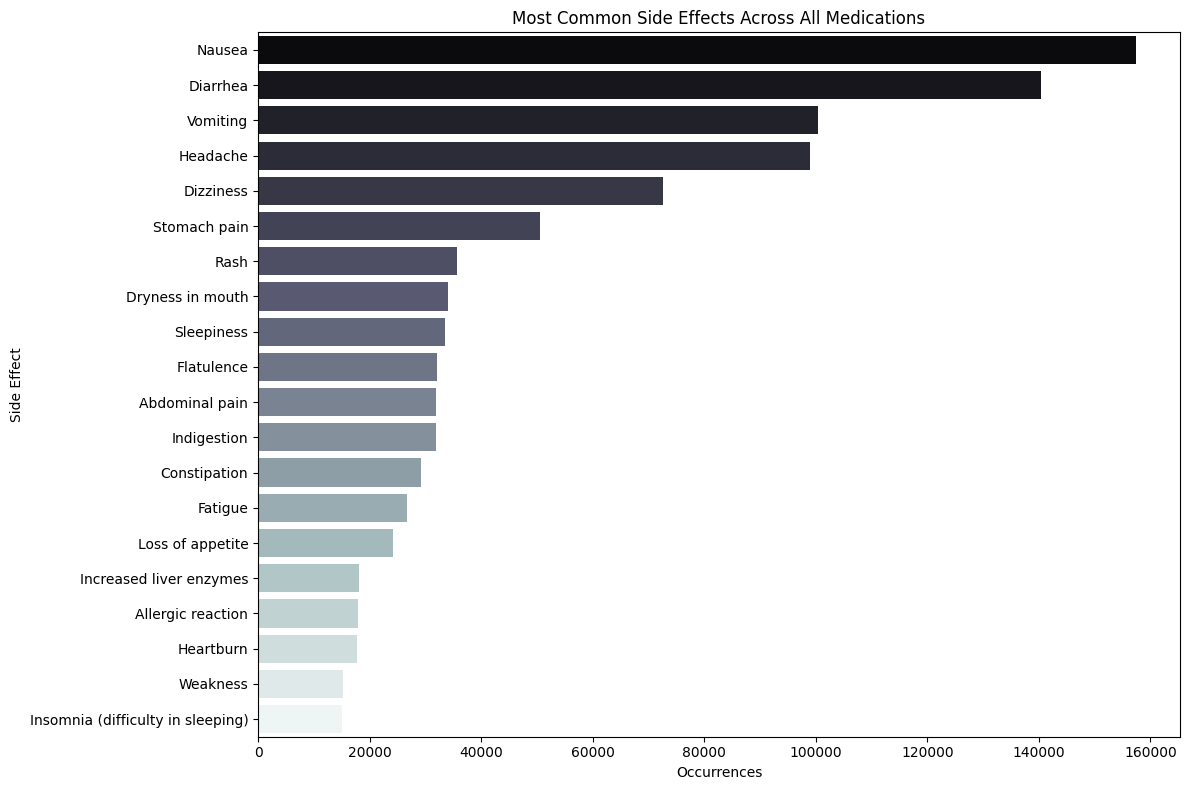

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 


df = pd.read_csv('/kaggle/input/250k-medicines-usage-side-effects-and-substitutes/medicine_dataset.csv')

side_effect_cols = [col for col in df.columns if 'sideeffect' in col.lower()]

all_effects = []
for col in side_effect_cols:
    all_effects += df[col].dropna().astype(str).str.capitalize().tolist()

side_effect_counts = Counter(all_effects)

side_df = pd.DataFrame(side_effect_counts.items(), columns=["Side Effect", "Count"])
side_df = side_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=side_df.head(20), x="Count", y="Side Effect", palette="bone")
plt.title("Most Common Side Effects Across All Medications")
plt.xlabel("Occurrences")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.show()
